In [1]:
%matplotlib notebook
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import colormaps as cmaps
import os
import scipy as sp
from scipy.ndimage.interpolation import rotate
from magpie_data import NeLMap2, OpticalFrames, PolarimetryMap2, FaradayMap2
from scipy.ndimage.interpolation import rotate
from scipy.ndimage.filters import gaussian_filter
import scipy.constants as c

C:\Users\jdavies\Anaconda3\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


# Optical Framing

In [1]:
cd "C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0120B16 C RECONNECTION 12 FRAME\s0120B16

C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0120B16 C RECONNECTION 12 FRAME\s0120B16


In [3]:
s=OpticalFrames(188,15)
s.logarithm()
s.rotate(-90+25)
s.crop((634,597), xcrop=230, ycrop=300)

C:\Users\jdavies\Documents\magpie-analysis\magpie_data.py:264: RuntimeWarning: divide by zero encountered in log
  self.s_l=[np.log(s_im) for s_im in self.s_n]


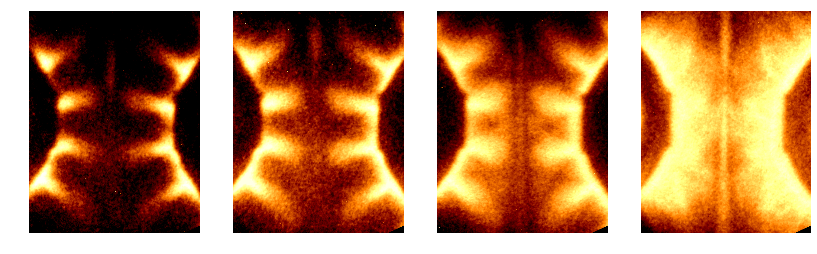

In [4]:
fig, ax=plt.subplots(1,4,figsize=(14,8))
s.plot_crop(frame=1, ax=ax[0], clim=[0.2,1])
s.plot_crop(frame=2, ax=ax[1], clim=[0.2,1])
s.plot_crop(frame=5, ax=ax[2], clim=[0.2,1.0])
s.plot_crop(frame=11, ax=ax[3], clim=[0.2,1.0])
for a in ax:
    a.set_title('')

In [5]:
fig.savefig("s0120B16 4 of 12 frames.png", dpi=300)

# Interferometry

In [59]:
%cd "~\Google Drive\MAGPIE\data\2015\s1006_15 Reconnection C TS upstream flow"

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s1006_15 Reconnection C TS upstream flow


In [60]:
s1006_15_532=NeLMap2('s1006_15 532nm neL.txt', scale=173, multiply_by=1/1.6,rot_angle=-90)
s1006_15_532.set_origin(origin=(2302,1411),extent=[-11.5,11.5,-8,8])
s1006_15_355=NeLMap2('s1006_15 355nm neL.txt', scale=128, multiply_by=2/1.6, rot_angle=-90, flip_lr=True)
s1006_15_355.set_origin(origin=(1620,1114),extent=[-11.5,11.5,-8,8])

In [61]:
fig=plt.figure(figsize=(16, 9))
ax1=fig.add_axes([0.0, 0.10, 0.5, 0.8])#l,b,w,h
gim=s1006_15_532.plot_data_mm(ax=ax1, clim=[0,2], multiply_by=1e-18)

for x_mm in [-2.9,-1]:
    ax1.plot([x_mm,x_mm],[-10,10], lw=3, ls='dashed')
ax1.lines[0].set_color('c')
ax1.lines[1].set_color('red')

ax1.set_xlabel('x (mm)',fontsize=28)
ax1.set_ylabel('y (mm)',fontsize=28)
ax1.set_xticks([-5,0,5])

ax1.set_xlim([-8,8])
ax1.set_ylim([-11.5,11.5])

ax1.tick_params(labelsize=28, pad=5, length=10, width=2)

cbar_ax=fig.add_axes([0.44, 0.10, 0.02, 0.8])#l,b,w,h
cbar_ax.tick_params(labelsize=28, pad=5, length=10, width=2)

fig.colorbar(gim, cax=cbar_ax, ticks=[0.0,1,2])
cbar_ax.set_ylabel(r'$n_e$ ($\times$ 10$^{18}$ cm$^{-3}$)',fontsize=28)


ax3=fig.add_axes([0.56, 0.1, 0.3, 0.8])#l,b,w,h
s=s1006_15_532

for y_mm in [-2.9,-1]:
    s.create_lineout(start=(10, y_mm),end=(-10, y_mm), lineout_width=10)
    s.plot_lineout(ax=ax3, label="x= "+str(y_mm)+" mm", multiply_by=1e-18)
    
ax3.lines[0].set_color('c')
ax3.lines[1].set_color('red')

ax3.set_xticks([-10,0,10])
ax3.set_xlabel('x (mm)',fontsize=28)

ax3.xaxis.set_minor_locator(MultipleLocator(2))
#plt.setp(ax3.get_xticklabels(), visible=False)

ax3.set_ylim([0, 2])
ax3.set_yticks([0, 1,2])
ax3.yaxis.set_minor_locator(MultipleLocator(0.5))

ax3.set_xlim([-10, 10])


ax3.grid()
ax3.grid(which='minor', color='gray',linestyle=':')

ax3.tick_params(which='minor', pad=5, length=7, width=1)
ax3.tick_params(labelsize=28, pad=5, length=10, width=2)

<IPython.core.display.Javascript object>

(3719, 882) (259, 882)
(3719, 1211) (259, 1211)


In [8]:
fig.savefig('s1006_15 nel and lineouts.png', dpi=300, bbox_inches='tight')

<IPython.core.display.Javascript object>


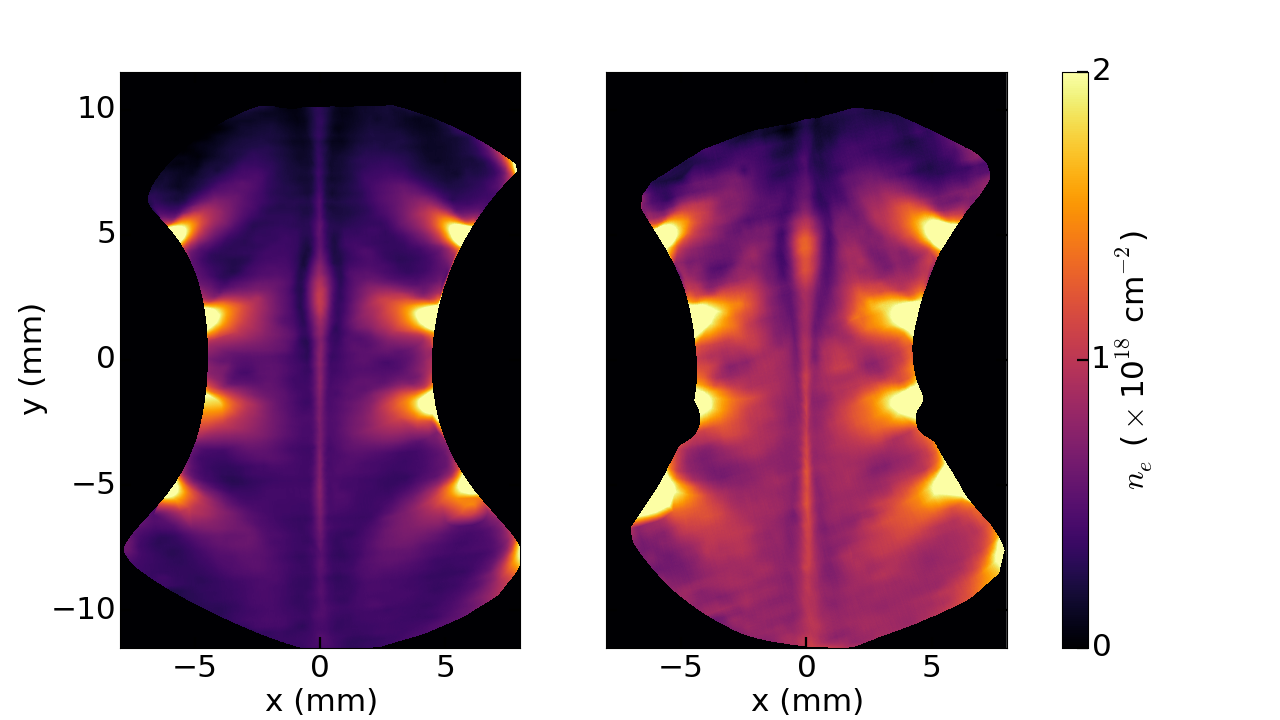

In [9]:
fig=plt.figure(figsize=(16, 9))
ax1=fig.add_axes([0.0, 0.10, 0.5, 0.8])#l,b,w,h
gim=s1006_15_532.plot_data_mm(ax=ax1, clim=[0,2], multiply_by=1e-18)

ax2=fig.add_axes([0.38, 0.10, 0.5, 0.8])#l,b,w,h
bim=s1006_15_355.plot_data_mm(ax=ax2, clim=[0,2],multiply_by=1e-18)

ax1.set_xlabel('x (mm)',fontsize=28)
ax1.set_ylabel('y (mm)',fontsize=28)
ax2.set_xlabel('x (mm)',fontsize=28)
ax2.set_xticks([-5,0,5])
ax1.set_xticks([-5,0,5])

ax1.set_xlim([-8,8])
ax1.set_ylim([-11.5,11.5])

ax1.tick_params(labelsize=28, pad=5, length=10, width=2)
ax2.tick_params(labelsize=28, pad=5, length=10, width=2)
plt.setp(ax2.get_yticklabels(), visible=False)

cbar_ax=fig.add_axes([0.83, 0.10, 0.02, 0.8])#l,b,w,h
cbar_ax.tick_params(labelsize=28, pad=5, length=10, width=2)

fig.colorbar(bim, cax=cbar_ax, ticks=[0.0,1,2])
cbar_ax.set_ylabel(r'$n_e$ ($\times$ 10$^{18}$ cm$^{-2}$)',fontsize=28)

In [6]:
fig.savefig('s1006_15 nel two times.png', dpi=300, bbox_inches='tight')

# Faraday
This one is quite involved, we do the full image registration.

In [62]:
cd "~\Google Drive\MAGPIE\data\2015\s0513_15 RECONNECTION - Carbon repeat\s0513_15"

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s0513_15 RECONNECTION - Carbon repeat\s0513_15


In [63]:
B0fn="13-May-2015 16_39_56_1355463638_fliplr.png"
B1fn="13-May-2015 16_39_56_2211629970.png"
S0fn="13-May-2015 17_00_09_1355463638_fliplr.png"
S1fn="13-May-2015 17_00_09_2211629970.png"
s0513_15_pol=PolarimetryMap2(B0fn, B1fn, B0fn, B1fn, S0fn, S1fn)
s=s0513_15_pol

In [64]:
s.register()
s.convert_to_alpha()

C:\Users\jdavies\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


In [65]:
s.scale=66
s.set_origin((1271,1680), extent=[-8,8,-7,7])

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


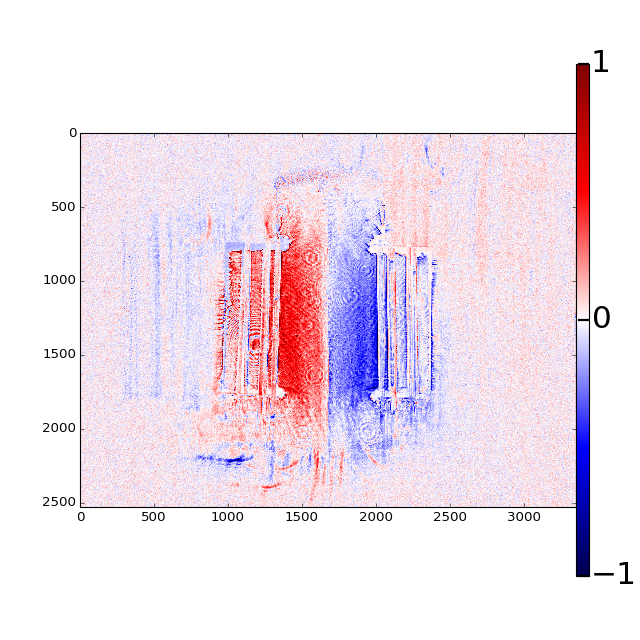

In [120]:
fig, ax=plt.subplots(figsize=(8,8))
far=s.plot_data_px(ax=ax,clim=[-1,1])

#ax.set_xlim([s.extent[0],s.extent[1]])
#ax.set_ylim([s.extent[2],s.extent[3]])
#ax.set_xlabel('x (mm)',fontsize=28)
#ax.set_ylabel('y (mm)',fontsize=28)

#ax.set_xticks([-6,-3,0,3, 6])
#ax.set_yticks([-6,-3,0,3,6])

#ax.tick_params(labelsize=28, pad=5, length=10, width=2)

cbar_ax = fig.add_axes([0.9, 0.10, 0.02, 0.8])#l,b,w,h
cbar_ax.tick_params(labelsize=28, pad=5, length=10, width=2)
fig.colorbar(far, cax=cbar_ax, ticks=[-1,0,1])
cbar_ax.set_ylabel(r'Rotation Angle $\alpha$ ($\circ$)',fontsize=28)

In [24]:
fig.savefig('s0513_15 alpha map hi res.pdf', dpi=300)

In [66]:
cd ".."

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s0513_15 RECONNECTION - Carbon repeat


In [67]:
s0513_15_far=FaradayMap2(s0513_15_pol,"s0513_15 IR side on image registration (2).jpg", "s0513_15 neL side on.txt")

In [68]:
b=s0513_15_far
b.I0zcn=np.flipud(b.I0zcn)
b.I1zc=np.flipud(b.I1zc)

In [69]:
b.register()

C:\Users\jdavies\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
C:\Users\jdavies\Documents\magpie-analysis\magpie_data.py:171: RuntimeWarning: divide by zero encountered in true_divide
  self.data=5.99e18*self.pm.data/self.IT
C:\Users\jdavies\Documents\magpie-analysis\magpie_data.py:171: RuntimeWarning: overflow encountered in true_divide
  self.data=5.99e18*self.pm.data/self.IT
C:\Users\jdavies\Documents\magpie-analysis\magpie_data.py:171: RuntimeWarning: invalid value encountered in true_divide
  self.data=5.99e18*self.pm.data/self.IT


C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


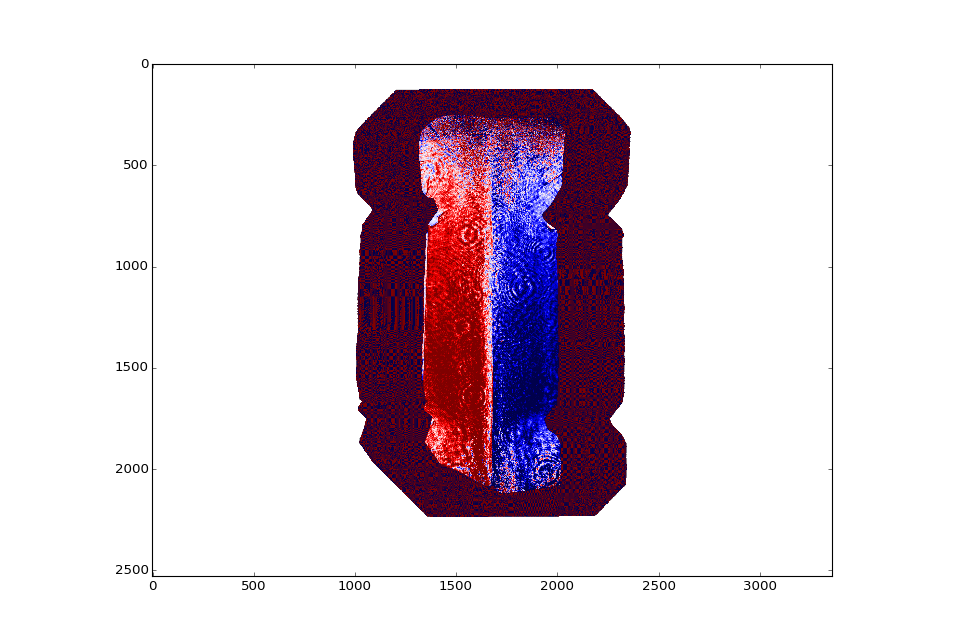

In [83]:
b.plot_data_px(clim=[-3,3])

In [72]:
b.scale=66
b.set_origin((1271,1680), extent=[-8,8,-7,7])

In [73]:
b.create_lineout(start=(0,-4.5), end=(0,4.5), lineout_width=200)

(528, 165) (528, 759)


C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


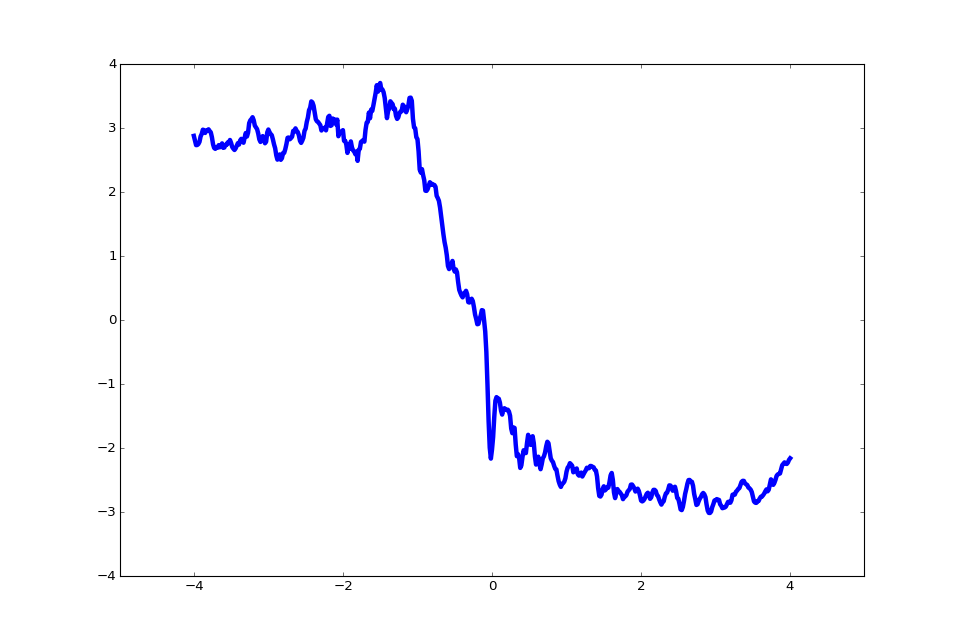

In [92]:
b.plot_lineout()

 - Adding parameter for hint "B0"
 - Adding parameter for hint "y0"
 - Adding parameter for hint "L"
 - Adding parameter for hint "C"
 - Adding parameter "y0"
 - Adding parameter "B0"
 - Adding parameter "L"
 - Adding parameter "C"
[[Model]]
    Model(Harris)
[[Fit Statistics]]
    # function evals   = 79
    # data points      = 595
    # variables        = 4
    chi-square         = 53.225
    reduced chi-square = 0.090
[[Variables]]
    B0:  -2.75031238 +/- 0.014582 (0.53%) (init= 2)
    y0:  -0.29073169 +/- 0.009989 (3.44%) (init= 0)
    L:    0.59096870 +/- 0.017361 (2.94%) (init= 0.25)
    C:    0.18216919 +/- 0.013773 (7.56%) (init= 0)
[[Correlations]] (unreported correlations are <  0.100)
    C(y0, C)                     = -0.444 
    C(B0, L)                     = -0.420 



<IPython.core.display.Javascript object>


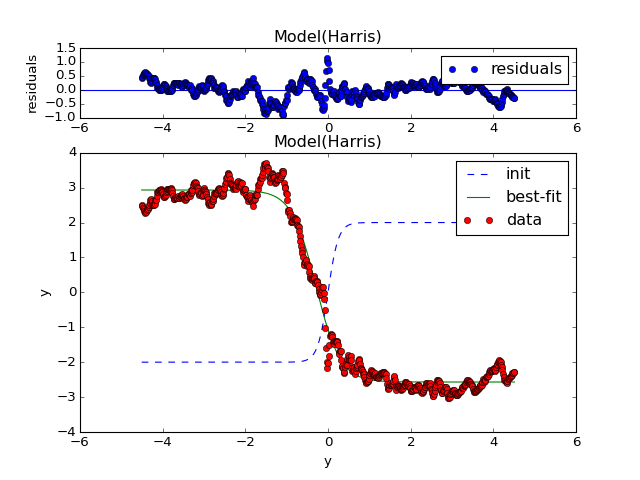

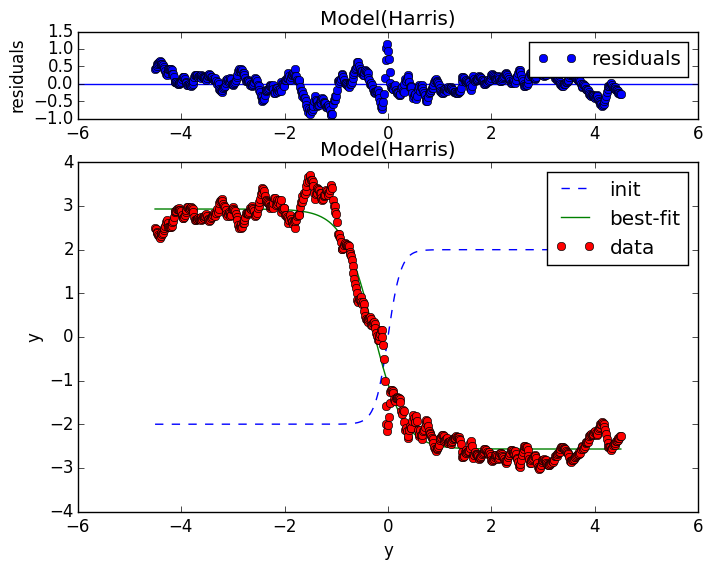

In [74]:
from lmfit import Model
def Harris(y, y0, B0, L,C):
    return B0*np.tanh((y-y0)/L)+C
hm=Model(Harris, independent_vars='y')
hm.set_param_hint('B0', value = 2)
hm.set_param_hint('y0', value = 0)
hm.set_param_hint('L', value = 0.25)
hm.set_param_hint('C', value = 0)
res=hm.fit(b.lo, y=b.mm)
print(res.fit_report())
res.plot()

In [154]:
y_B=b.mm-res.best_values['y0']
B=b.lo-res.best_values['C']
hm=Model(Harris, independent_vars='y')
hm.set_param_hint('B0', value = 2)
hm.set_param_hint('y0', value = 0)
hm.set_param_hint('L', value = 0.25)
hm.set_param_hint('C', value = 0)
res=hm.fit(B, y=b.mm-res.best_values['y0'])

 - Adding parameter for hint "B0"
 - Adding parameter for hint "y0"
 - Adding parameter for hint "L"
 - Adding parameter for hint "C"
 - Adding parameter "y0"
 - Adding parameter "B0"
 - Adding parameter "L"
 - Adding parameter "C"


In [94]:
n_av=np.mean(b.IT[1271-100:1271+100,1680-297:1680+298], axis=0)

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


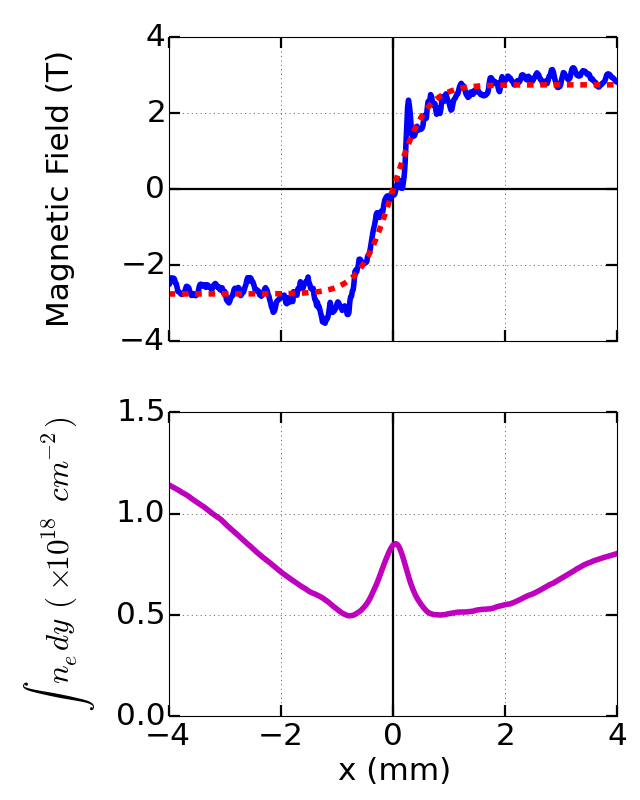

In [127]:
fig, (ax1,ax2)= plt.subplots(2, sharex=True, figsize=(8,10))

ax1.plot([-4, 4], [0, 0], color='k', linewidth=2)
ax1.plot([0, 0], [-4, 4], color='k', linewidth=2)
ax2.plot([0, 0], [0, 2], color='k', linewidth=2)

ax1.plot(y_B,-B, label='Magnetic Field', color='b', lw=5)
ax1.plot(y_B,-res.best_fit, label='B Fitted', color='red', lw=5, ls='--')

ax2.plot(y_B,n_av/1e18, lw=5, color='m', label='Electron Density')

ax1.set_xlim([-4,4])
ax1.set_xticks(np.arange(-4,4+1,2))
ax2.set_xlabel('x (mm)', fontsize=28)
ax1.set_ylim([-4,4])
ax1.set_yticks([-4,-2,0,2,4])
ax1.set_ylabel('Magnetic Field (T)',fontsize=28)

ax2.set_ylim([0,1.5])
ax2.set_yticks([0,0.5,1,1.5])

ax1.get_yaxis().set_label_coords(-0.21,0.5)
ax2.get_yaxis().set_label_coords(-0.16,0.5)

fig.subplots_adjust(hspace=0.8)


ax2.set_ylabel(r'$\int \,n_e dy \,(\times 10^{18}\,cm^{-2})$',fontsize=28)
ax1.tick_params(labelsize=28, pad=5, length=10, width=2)
ax2.tick_params(labelsize=28, pad=5, length=10, width=2)
#ax1.set_title(r's0513_15: $B$ and $n_e$',fontsize=40, y=1.02)
ax1.grid()
ax2.grid()
fig.tight_layout()

In [128]:
fig.savefig("s0513_15 B and neL.png", dpi=300)

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


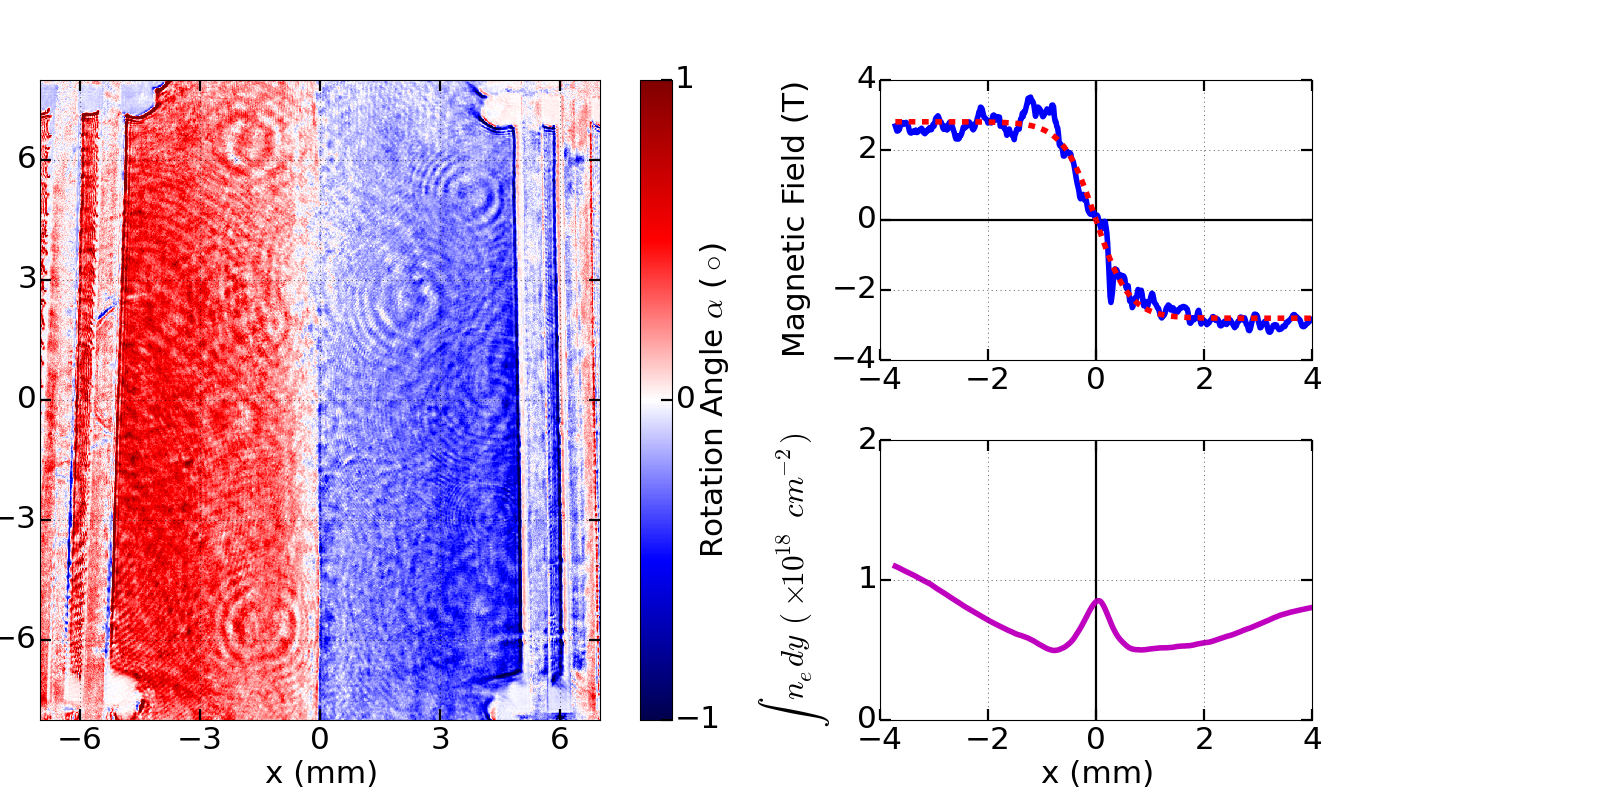

In [119]:
fig=plt.figure(figsize=(20,10))

ax=fig.add_axes([0.0, 0.10, 0.4, 0.8])#l,b,w,h

far=s.plot_data_mm(ax=ax,clim=[-1,1])

ax.set_xlim([s.extent[0],s.extent[1]])
ax.set_ylim([s.extent[2],s.extent[3]])
ax.set_xlabel('x (mm)',fontsize=28)
ax.set_ylabel('z (mm)',fontsize=28)

ax.set_xticks([-6,-3,0,3, 6])
ax.set_yticks([-6,-3,0,3,6])

ax.tick_params(labelsize=28, pad=5, length=10, width=2)

ax.grid()

cbar_ax = fig.add_axes([0.40, 0.10, 0.02, 0.8])#left,bottom,width,height
cbar_ax.tick_params(labelsize=28, pad=5, length=10, width=2)
fig.colorbar(far, cax=cbar_ax, ticks=[-1,0,1])
cbar_ax.set_ylabel(r'Rotation Angle $\alpha$ ($\circ$)',fontsize=28)

cbar_ax.get_yaxis().set_label_coords(1.8,0.5)


ax2=fig.add_axes([0.55, 0.10, 0.27, 0.35])
ax1=fig.add_axes([0.55, 0.55, 0.27, 0.35], sharex=ax2)#left,bottom,width,height

ax1.plot([-4, 4], [0, 0], color='k', linewidth=2)
ax1.plot([0, 0], [-4, 4], color='k', linewidth=2)
ax2.plot([0, 0], [0, 2], color='k', linewidth=2)

ax1.plot(y_B,B, label='Magnetic Field', color='b', lw=5)
ax1.plot(y_B,res.best_fit, label='B Fitted', color='red', lw=5, ls='--')

ax2.plot(y_B,n_av/1e18, lw=5, color='m', label='Electron Density')

ax1.set_xlim([-4,4])
ax1.set_xticks(np.arange(-4,4+1,2))
ax2.set_xlabel('x (mm)', fontsize=28)
ax1.set_ylim([-4,4])
ax1.set_yticks([-4,-2,0,2,4])
ax1.set_ylabel('Magnetic Field (T)',fontsize=28)

ax2.set_ylim([0,2])
ax2.set_yticks([0,1,2])

ax1.get_yaxis().set_label_coords(-0.16,0.5)
ax2.get_yaxis().set_label_coords(-0.11,0.5)

fig.subplots_adjust(hspace=0.8)


ax2.set_ylabel(r'$\int \,n_e dy \,(\times 10^{18}\,cm^{-2})$',fontsize=28)
ax1.tick_params(labelsize=28, pad=5, length=10, width=2)
ax2.tick_params(labelsize=28, pad=5, length=10, width=2)
#ax1.set_title(r's0513_15: $B$ and $n_e$',fontsize=40, y=1.02)
ax1.grid()
ax2.grid()
#fig.tight_layout()


In [ ]:
fig.savefig('s0513_15 faraday analysis.pdf', dpi=300, bbox_inches='tight')

# Thomson setup

In [ ]:
cd "~\Google Drive\MAGPIE\data\2015\s1026_15 Reconnection C TS Outflow 255ns"

In [ ]:
s1026_15_532=NeLMap('s1026_15 532nm neL.txt', scale=173)
s1026_15_532.set_origin(origin=(1734,2449))

In [ ]:
s=s1026_15_532
fig, ax=plt.subplots(figsize=(8,8))
gim=s.plot_neL_mm(ax=ax, clim=[0,2],transpose=True)

ax.set_xlim([-4.4,4.4])
ax.set_ylim([-8,8])
ax.axis('off')

# Thomson Data Vertical

In [2]:
cd "~\Google Drive\MAGPIE\data\2016\s0429_16 C Reconnection TS\s0429_16 TS"

C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0429_16 C Reconnection TS\s0429_16 TS


In [3]:
ts=np.loadtxt('s0429_16 shot.asc')
ts=np.rot90(ts)

In [43]:
roi=ts[220:490,950:1104]

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


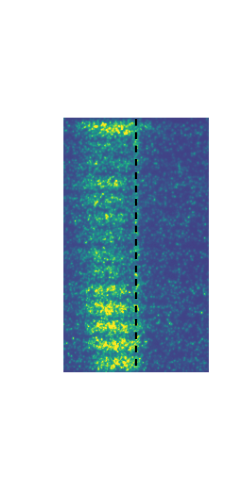

In [46]:
fig,ax=plt.subplots(figsize=(3,6))
ax.imshow(roi, clim=[400,1600], cmap=cmaps.viridis)
ax.plot([77,77],[0,269], lw=2, color='black', ls='--')
plt.axis('off')
fig.tight_layout()

In [48]:
fig.savefig('s0429_16 raw TS.png', dpi=300, bbox_inches='tight')

In [42]:
cd "~\Google Drive\MAGPIE\data\2015\s0611_15\s0611_15 TS t240ns\shot"

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s0611_15\s0611_15 TS t240ns\shot


In [5]:
ts=np.loadtxt('s0611_15 shot (corrupted line removed).asc')
ts=np.rot90(ts)

In [25]:
roi=ts[:270,980:1056]

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


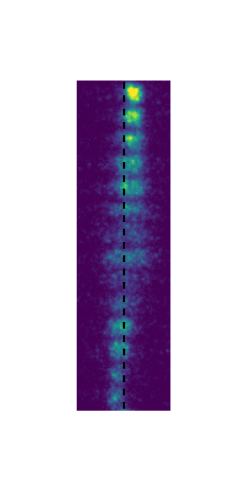

In [38]:
fig,ax=plt.subplots(figsize=(3,6))
ax.imshow(roi, clim=[620,900], cmap=cmaps.viridis)
ax.plot([38,38],[0,269], lw=2, color='black', ls='--')
plt.axis('off')
fig.tight_layout()

In [39]:
fig.savefig('s0611_15 raw TS a fibres.png', dpi=300, bbox_inches='tight')

# Thomson Raw Data

In [40]:
fn="s0429_16 f14.dat"
shift=[]
Background=[]
Response=[]
Shot=[]
Fit=[]

with open(fn, 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    next(reader)
    for row in reader:
        shift.append(float(row[0]))
        Background.append(float(row[1]))
        Response.append(float(row[2]))
        Shot.append(float(row[3]))
        Fit.append(float(row[4]))
        
fig, ax=plt.subplots(figsize=(8,14))
ax.plot(shift, np.array(Response)*0.2, lw=3, color='green', label='Laser')
ax.scatter(shift, Shot, color='blue', marker='o', label='Data')
ax.plot(shift, Fit, lw=3, color='red', label='Fit')
ax.set_xlim([-10,10])
ax.set_ylim([0,1])
ax.tick_params(labelsize=24, pad=5, length=10, width=2)
ax.legend(fontsize=24)

ax.set_xlabel(r'Shift $(\AA)$',fontsize=28)
ax.set_ylabel('Intensity (a.u.)',fontsize=28)

FileNotFoundError: [Errno 2] No such file or directory: 's0429_16 f14.dat'

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


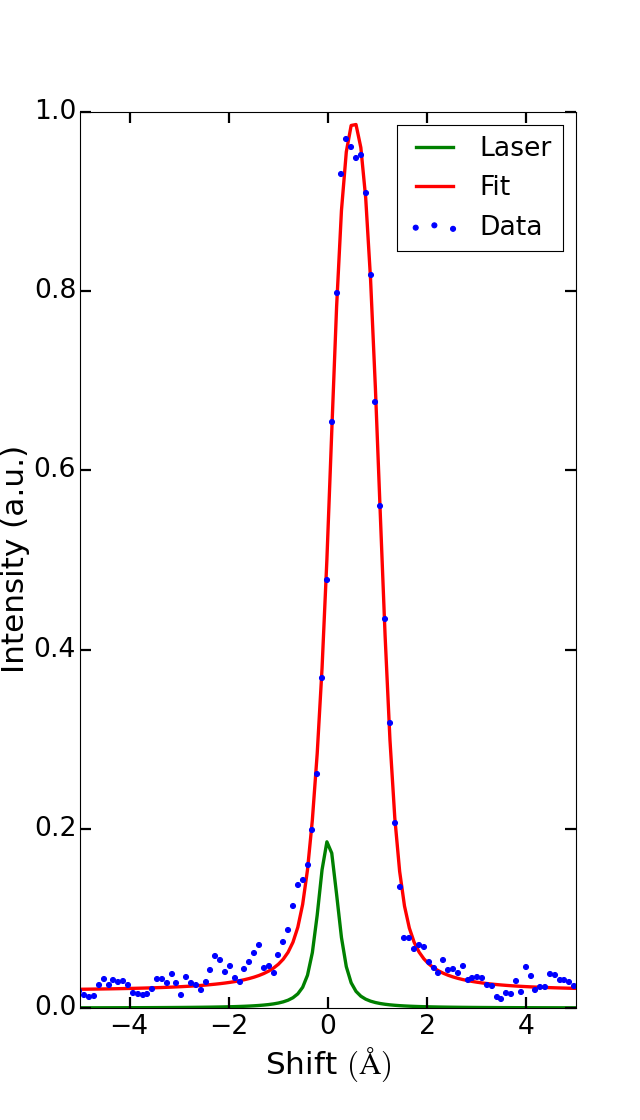

In [53]:
fn="s0611_15 f1a.txt"
shift=[]
Background=[]
Response=[]
Shot=[]
Fit=[]

with open(fn, 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    next(reader)
    for row in reader:
        shift.append(float(row[0]))
        Background.append(float(row[1]))
        Response.append(float(row[2]))
        Shot.append(float(row[3]))
        Fit.append(float(row[4]))
        
fig, ax=plt.subplots(figsize=(8,14))
ax.plot(shift, np.array(Response)*0.2, lw=3, color='green', label='Laser')
ax.plot(shift, np.array(Fit)*0.97, lw=3, color='red', label='Fit',zorder=1)
ax.scatter(shift, np.array(Shot)*0.97, color='blue', marker='o', label='Data',zorder=2)

ax.set_xlim([-5,5])
ax.set_ylim([0,1])
ax.tick_params(labelsize=24, pad=5, length=10, width=2)
ax.legend(fontsize=24)

ax.set_xlabel(r'Shift $(\AA)$',fontsize=28)
ax.set_ylabel('Intensity (a.u.)',fontsize=28)

In [54]:
fig.savefig('s0611_15 f1a.png', dpi=300, bbox_inches='tight')

# Fibre locations

In [53]:
cd "~\Google Drive\MAGPIE\data\2016\s0429_16 C Reconnection TS\"

C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0429_16 C Reconnection TS


In [54]:
s0429_16_532=NeLMap2('s0429_16 532nm neL.txt', scale=174, multiply_by=1/1.6, rot_angle=-90+22.5)
s=s0429_16_532
s.set_origin(origin=(2880,2348), extent=[-12,12,-9,9])

In [55]:
f=[1,8,14]
xx=[1004,1761,2406]
yy=[1054,1350,1604]
        
xm, xc=np.polyfit(f,xx, 1)
ym, yc=np.polyfit(f, yy, 1)
scale=1 #useful if pin positions taken at different scale to shot
y=lambda f: scale*int(f*ym+yc)
x=lambda f: scale*int(f*xm+xc)

In [56]:
x0=4752/2
x0p=s.data.shape[1]/2
y0=3168/2
y0p=s.data.shape[0]/2
th=(90-22.5)/180*np.pi#s.rot_angle

xxr=[]
yyr=[]

for x,y in zip(xx,yy):
    xp=(x-x0)
    yp=(y-y0)
    xr=np.cos(th)*xp-np.sin(th)*yp
    yr=np.sin(th)*xp+np.cos(th)*yp
    xxr.append(xr+x0p)
    yyr.append(yr+y0p)
    
xm, xc=np.polyfit(f,xxr, 1)
ym, yc=np.polyfit(f, yyr, 1)
scale=1 #useful if pin positions taken at different scale to shot
y=lambda f: scale*int(f*ym+yc)
x=lambda f: scale*int(f*xm+xc)

In [57]:
iff=plt.imread('s0429_16 532nm end on interferometry (1).JPG')
ifr=rotate(iff, -90+22.5)

<IPython.core.display.Javascript object>


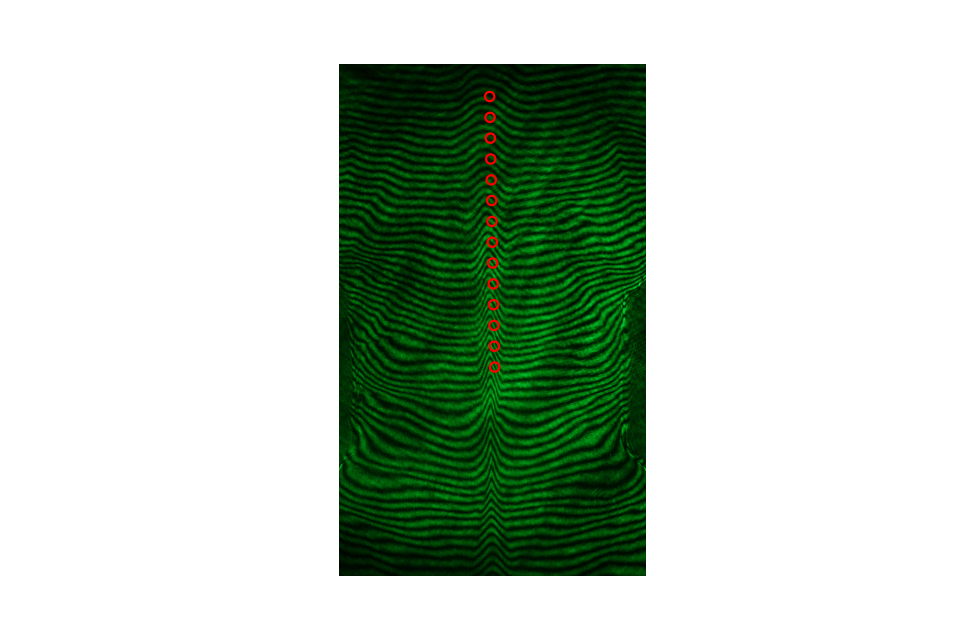

(1500.0, 3200.0, 4000.0, 1150.0)

In [58]:
fig, ax=plt.subplots(figsize=(12,8))
ax.imshow(ifr)

for i in range(1,15):
    color='red'
    ax.add_artist(plt.Circle((x(i),y(i)),26,color=color,fill=False, lw=2))
    
ax.set_ylim([4000, 1150])
ax.set_xlim([1500,3200])
plt.axis('off')

# Ion Acoustic Instability

In [77]:
cd "~\Google Drive\MAGPIE\data\2015\s0611_15"

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s0611_15


In [108]:
#Fibre,X positions,Y Positions,Y wrt Shock,Length along porbing line,n_e, 6:n_e corrected, 7:T_e, 8:T_i, 9:Z, 10:V_f_par, 11:V_f_per
x_pos=[]
Z=[]
T_e=[]
T_i=[]

filename='s0611_15 TS fits v3.dat'
with open(filename, 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    next(reader)
    for row in reader:
        x_pos.append(float(row[3]))
        Z.append(float(row[6]))
        T_e.append(float(row[7]))
        T_i.append(float(row[9]))
        
x_TS=np.array(x_pos)
Z=np.array(Z)
T_e=np.array(T_e)
T_i=np.array(T_i)

In [101]:
A=12
C_IA=(9.79e5*A**-0.5*(Z*T_e+T_i)**0.5)*1e-2 #m/s

In [92]:
B_0=res.best_values['B0']
L=res.best_values['L']
j=-B_0/(c.mu_0*(L*1e-3)*(np.cosh(b.mm/L))**2)#Ampere m^-2

## Bring in end on n_e to estimate u_ed

In [113]:
cd "C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s0513_15 RECONNECTION - Carbon repeat"

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s0513_15 RECONNECTION - Carbon repeat


In [115]:
s0513_15_532=NeLMap2('s0513_15 neL end on.txt', multiply_by=1/1.6, scale=173,rot_angle=-90)

In [132]:
#s0513_15_532.plot_data_px()

<IPython.core.display.Javascript object>


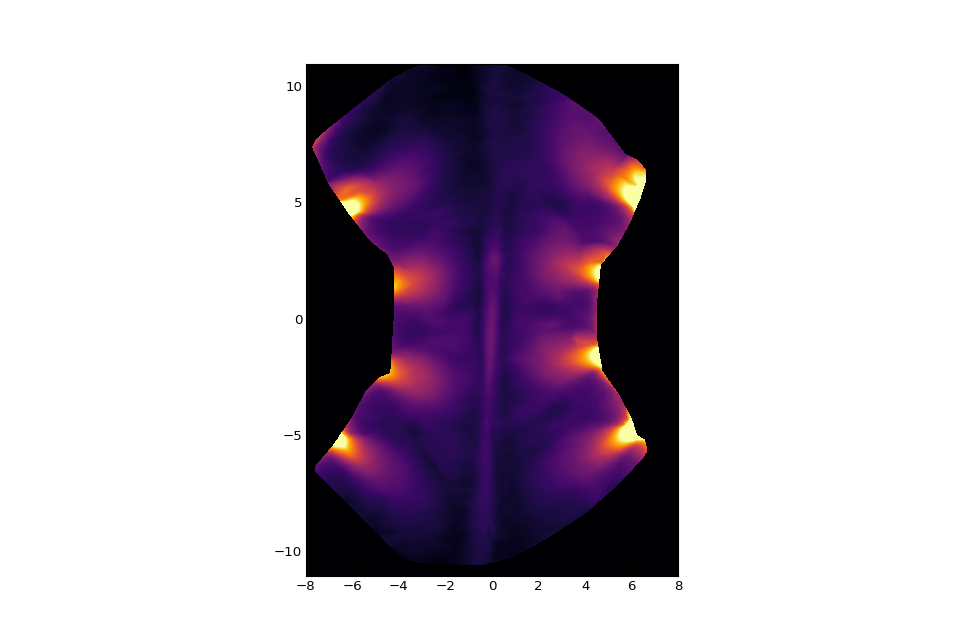

In [122]:
s0513_15_532.set_origin(origin=(2470,1764), extent=[-11,11,-8,8])
s0513_15_532.plot_data_mm(clim=[0,2], multiply_by=1/1e18)

In [131]:
s0513_15_532.create_lineout(start=(0,-3), end=(0,3))
#s0513_15_532.plot_lineout()
ne_interp=np.interp(b.mm, s0513_15_532.mm, s0513_15_532.lo)
u_ed=j/(ne_interp*1e6/2*c.e) #m/s

(1903, 865) (1903, 1903)


C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


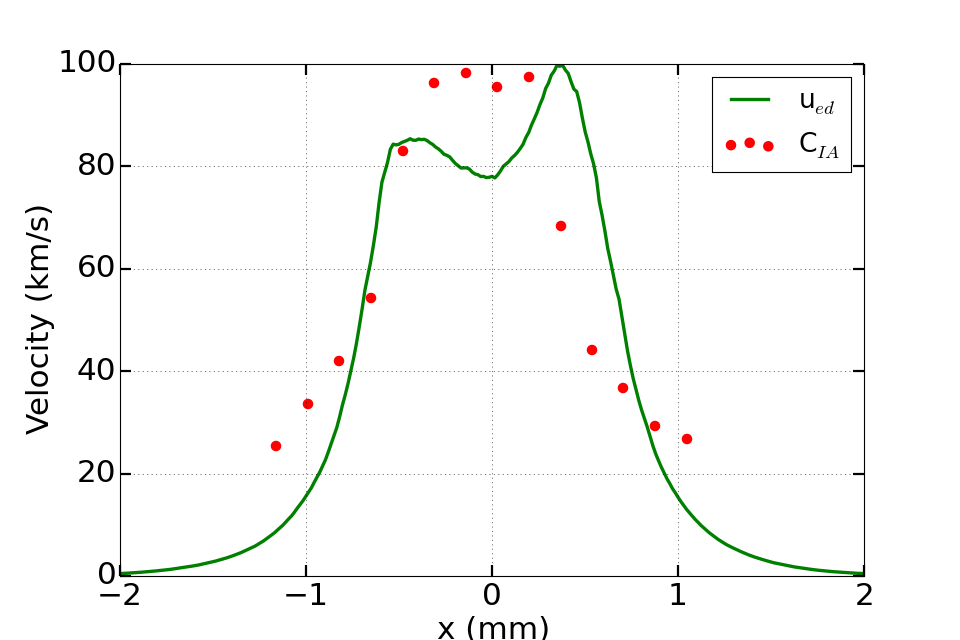

In [151]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(b.mm, u_ed/1e3, color='green', lw=3, label=r'u$_{ed}$')
ax.scatter(x_TS, C_IA/1e3, color='red', lw=5, label=r'C$_{IA}$')
ax.tick_params(labelsize=28, pad=5, length=10, width=2)
ax.legend(fontsize=24)
ax.set_ylabel('Velocity (km/s)', fontsize=28)
ax.set_xlabel('x (mm)', fontsize=28)
ax.set_ylim([0,100])
ax.set_xlim([-2,2])
ax.set_xticks([-2,-1,0,1,2])
ax.grid()


C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


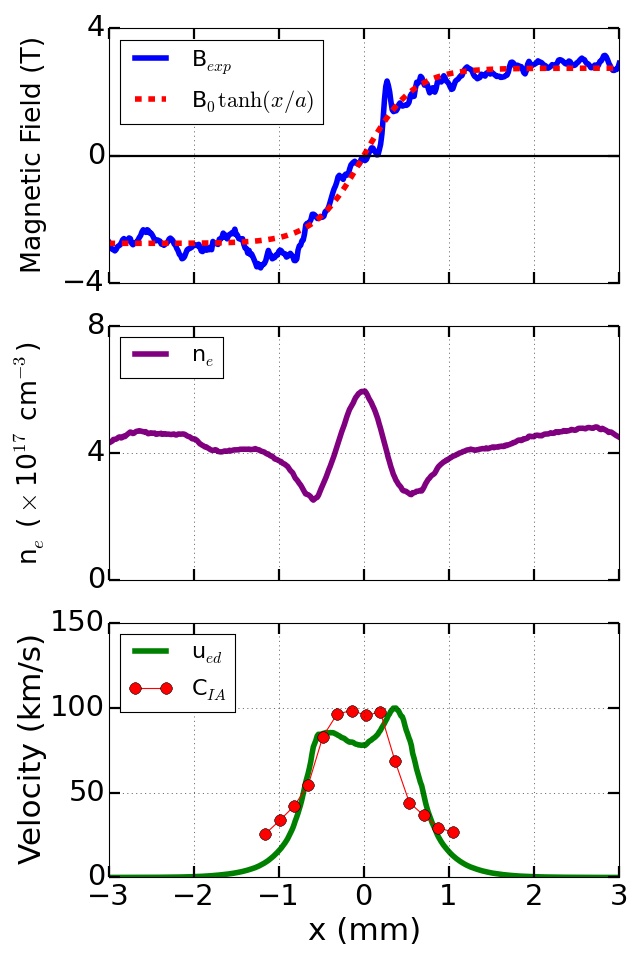

In [187]:
fig, ax= plt.subplots(3, sharex=True, figsize=(8,12))
ax1=ax[0]
ax2=ax[1]
ax3=ax[2]

ax1.plot(y_B,-B, label=r'B$_{exp}$', color='b', lw=5)
ax1.plot(y_B,-res.best_fit, label=r'B$_0\tanh(x/a)$', color='red', lw=5, ls='--')
ax1.plot([-3, 3], [0, 0], color='k', linewidth=2)

ax1.set_xlim([-3,3])
ax1.set_xticks(np.arange(-3,3+1,1))
ax1.set_ylim([-4,4])
ax1.set_yticks(np.arange(-4,5,4))
ax1.set_ylabel('Magnetic Field (T)',fontsize=24)

ax2.plot(b.mm,ne_interp/1e17, lw=5, color='purple', label=r'n$_e$')
ax2.set_ylim([0,8])
ax2.set_yticks([0,4,8])
ax2.set_ylabel(r'n$_e$ ($\times$ 10$^{17}$ cm$^{-3}$)',fontsize=24)

ax3.plot(b.mm, u_ed/1e3, color='green', lw=5, label=r'u$_{ed}$')
ax3.plot(x_TS, C_IA/1e3, color='red', lw=1, marker='o', markersize=10,label=r'C$_{IA}$')

ax3.set_ylabel('Velocity (km/s)', fontsize=28)
ax3.set_xlabel('x (mm)', fontsize=28)
ax3.set_ylim([0,150])
ax3.set_xlim([-3,3])
ax3.set_yticks([0,50,100,150])
ax3.set_xticks([-3,-2,-1,0,1,2,3])

for a in ax:
    a.legend(fontsize=20, loc=2)
    a.tick_params(labelsize=26, pad=5, length=10, width=2)
    a.get_yaxis().set_label_coords(-0.12,0.5)
    a.grid()

fig.tight_layout()

In [188]:
fig.savefig('s0513_16 and s0611_15 C_IA vs u_ed.png', dpi=300)

In [172]:
%pwd

'C:\\Users\\jdavies\\Google Drive\\MAGPIE\\data\\2015\\s0513_15 RECONNECTION - Carbon repeat'